In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#hyperparameterselection_f1val, hyperparameterselectionfw015, '$F1_{weighted}^{0.15}$' hyperparameterselectionfw03, '$F1_{weighted}^{0.3}$'
filename = 'hyperparameterselection_f1val'
#xaxisname = '$F1_{weighted}^{0.15}$'
xaxisname = '$F1_{val}$'
df = pd.read_csv(filename+'.csv')
df = df[['f1_val', 'f1_test', 'ranking_method']]
df.dropna(inplace=True)

In [41]:
#hyperparameterselection_f1val, hyperparameterselectionfw015, '$F1_{weighted}^{0.15}$' hyperparameterselectionfw03, '$F1_{weighted}^{0.3}$'
filename = 'hyperparameterselection_f1val'
xaxisname = '$F1_{val}$'
df = pd.read_csv(filename+'.csv')
df = df[['f1_val', 'f1_test', 'ranking_method']]
df.dropna(inplace=True)

df.sort_values('f1_val', ascending=False)

,f1_val,f1_test,ranking_method
2,0.631273,0.523581,max_pairwise_confusion
4,0.630248,0.519068,proportion
64,0.626127,0.553012,max_pairwise_confusion
66,0.624060,0.506464,proportion
8,0.622756,0.545518,max_confusion
...,...,...,...
98,0.516090,0.488996,max_pairwise_confusion
93,0.515372,0.520767,proportion
78,0.514591,0.516218,max_confusion
30,0.512105,0.489246,max_confusion


In [42]:
method_styles = {
    'max_pairwise_confusion': {'marker': 'o', 'color': 'b'},
    'proportion': {'marker': 's', 'color': 'g'},
    'max_confusion': {'marker': '^', 'color': 'r'},
    'no_priority': {'marker': 'D', 'color': 'c'},
    'CCR': {'marker': 'P', 'color': 'm'}
}

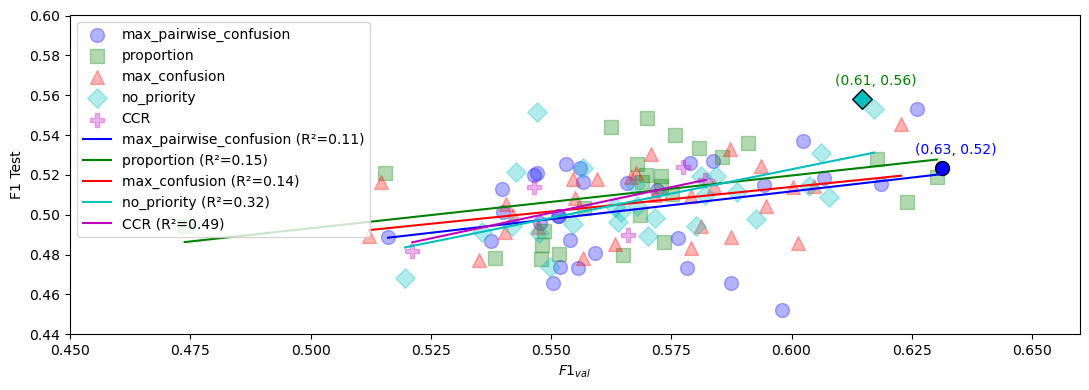

In [43]:
# Create scatter plot with seaborn and fixed symbols and colors
plt.figure(figsize=(11, 4))

# Plot scatter plot with fixed styles
for method, style in method_styles.items():
    subset = df[df['ranking_method'] == method]
    plt.scatter(subset['f1_val'], subset['f1_test'], label=method, marker=style['marker'], 
                color=style['color'], s=100, alpha=0.3)

# Add regression lines and R^2 values
for method, style in method_styles.items():
    subset = df[df['ranking_method'] == method]
    if not subset.empty:
        X = subset['f1_val'].values.reshape(-1, 1)
        y = subset['f1_test'].values

        # Fit regression model
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)
        r2 = r2_score(y, y_pred)

        # Plot regression line
        sns.lineplot(x=subset['f1_val'], y=y_pred, label=f'{method} (R²={r2:.2f})', color=style['color'])
plt.legend()
# Find and mark the best points
best_f1_val_idx = df['f1_val'].idxmax()
best_f1_test_idx = df['f1_test'].idxmax()

# Mark the best points with the original symbol and alpha set to 1
best_val_point = df.loc[best_f1_val_idx]
best_test_point = df.loc[best_f1_test_idx]

plt.scatter([best_val_point['f1_val']], [best_val_point['f1_test']],
            marker=method_styles[best_val_point['ranking_method']]['marker'],
            color=method_styles[best_val_point['ranking_method']]['color'],
            s=100, alpha=1, edgecolor='k', linewidth=1)

plt.scatter([best_test_point['f1_val']], [best_test_point['f1_test']],
            marker=method_styles[best_test_point['ranking_method']]['marker'],
            color=method_styles[best_test_point['ranking_method']]['color'],
            s=100, alpha=1, edgecolor='k', linewidth=1)

# Annotate the best points
plt.annotate(f"({best_val_point['f1_val']:.2f}, {best_val_point['f1_test']:.2f})",
             (best_val_point['f1_val'], best_val_point['f1_test']),
             textcoords="offset points", xytext=(10,10), ha='center', color='b')

plt.annotate(f"({best_test_point['f1_val']:.2f}, {best_test_point['f1_test']:.2f})",
             (best_test_point['f1_val'], best_test_point['f1_test']),
             textcoords="offset points", xytext=(10,10), ha='center', color='g')

plt.xlim(0.45, 0.66)
plt.ylim(0.44, 0.6)
plt.xlabel(xaxisname)
plt.ylabel('F1 Test')
#plt.legend().set_visible(False)
plt.tight_layout()
plt.savefig(filename+'.png')
plt.show()

KeyError: 'Step'

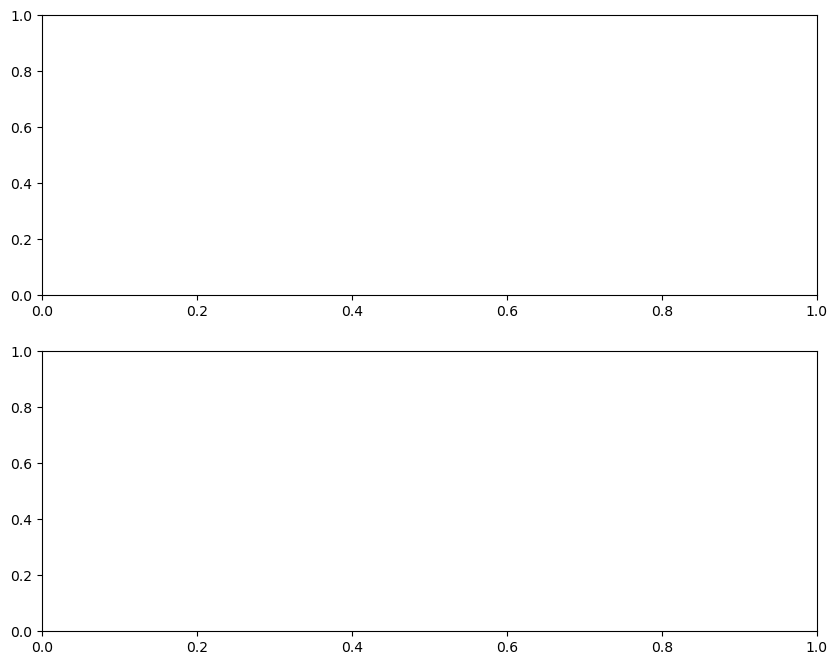

In [13]:
data = pd.read_csv('convergence_100_hs_fw03.csv')
data.columns = ['Step', 'loss', 'val_loss', 'synthetic_loss', 'f1_train', 'f1_val', 'f1_synthetic', 'patience']

# Determine the step with the best patience value
best_patience_step = 7
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for loss values with dual y-axis
ax1.plot(df['Step'], df['loss'], label='Loss', color='b')
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
ax3.plot(df['Step'], df['val_loss'], label='Validation Loss', color='g')
ax3.set_ylabel('Validation Loss', color='g')
ax3.tick_params(axis='y', labelcolor='g')

ax1.axvline(x=best_patience_step, color='r', linestyle='--', label='Patience = 0')
ax1.set_title('Loss Values')


# Plot for f1_score values
ax2.plot(df['Step'], df['f1_train'], label='F1 Train')
ax2.plot(df['Step'], df['f1_val'], label='F1 Validation')
ax2.plot(df['Step'], df['f1_synthetic'], label='F1 synthetic samples')

ax2.axvline(x=best_patience_step, color='r', linestyle='--')
ax2.set_title('F1 Score Values')
ax2.set_xlabel('Step')
ax2.set_ylabel('F1 Score')
ax2.legend()

plt.tight_layout()

plt.savefig('Training.png')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
print(y)
print(clf.predict_proba(X))
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')